<a href="https://colab.research.google.com/github/LalithaEvani/Madhumeha/blob/main/Heart_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
#importing pandas for loading data 
import pandas as pd


In [230]:
#mount google drive to load the data stored in the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:
#read data from drive and separate data based on commas and name each colum with the values given in names attribute. 
heart_data = pd.read_csv("/content/drive/My Drive/heart_dataa.csv")
heart_data

,age,sex,chest pain type,resting_blood_pressure,serum cholestrol,resting electrocardiographic results,max heart rate achieved,exercise induced angina,ST depression induced by exercise relative to rest,slope of peak exercise ST segment,number of major vessels colored by flouroscopy,thalassaemia,label
0,63,1,1,145,233,2,150,0,2.3,3,0,6,0
1,53,1,4,140,203,2,155,1,3.1,3,0,7,1
2,56,1,3,130,256,2,142,1,0.6,2,1,6,2
3,52,1,3,172,199,0,162,0,0.5,1,0,7,0
4,58,0,1,150,283,2,162,0,1.0,1,0,3,0
5,60,1,4,117,230,0,160,1,1.4,1,2,7,2
6,61,1,3,150,243,0,137,1,1.0,2,0,3,0
7,59,1,3,150,212,0,157,0,1.6,1,0,3,0
8,65,0,3,140,417,2,157,0,0.8,1,1,3,0
9,53,1,3,130,197,2,152,0,1.2,3,0,3,0


In [232]:
#feature selection 
#1) Univariate selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



X = heart_data.iloc[:,0:12]  #independent columns

y = heart_data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                                                Specs      Score
6                             max heart rate achieved  31.493847
4                                    serum cholestrol  24.393137
3                              resting_blood_pressure  24.112508
10     number of major vessels colored by flouroscopy  15.546360
8   ST depression induced by exercise relative to ...  15.344758
7                             exercise induced angina   9.825828
11                                       thalassaemia   9.208317
2                                     chest pain type   4.585326
5                resting electrocardiographic results   4.217391
9                   slope of peak exercise ST segment   2.163748
0                                                 age   2.087768
1                                                 sex   0.646914


[0.08322738 0.02632624 0.1086215  0.08673028 0.06793828 0.03557411
 0.08137692 0.10554699 0.08969206 0.08205417 0.13483867 0.09807339]


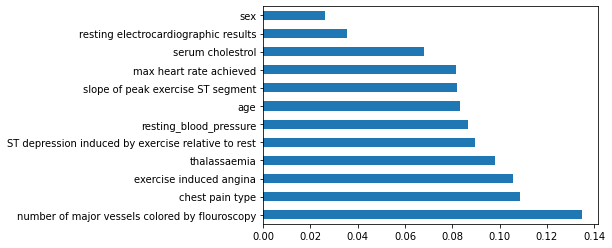

In [233]:
#feature selection 
#2)feature importance using ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [234]:
#Performance metrics list initialization
algorithms = []
accuracy = [] 
precision = []
recall = []
F1score = [] 
time_taken_train = []
time_taken_test = [] 

In [235]:
from sklearn import metrics
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

def performance(y_test, y_pred, startTime, endTrainTime, endTestTime, algorithm):
  train_time = endTrainTime - startTime
  test_time = endTestTime - endTrainTime
  acc = metrics.accuracy_score(y_test,y_pred)
  pre = metrics.precision_score(y_test,y_pred,average='weighted')
  rec = metrics.recall_score(y_test,y_pred,average='micro')
  f1 = metrics.f1_score(y_test,y_pred,average='weighted')
  print("Accuracy: ", acc)
  print("Precision: ", pre)
  print("Recall: " , rec)
  print("F1 Score: ", f1)
  print("Train Time: ",train_time)
  print("Test Time: ",test_time)
  algorithms.append(algorithm)
  accuracy.append(acc)
  precision.append(pre)
  recall.append(rec)
  F1score.append(f1)
  time_taken_train.append(train_time)
  time_taken_test.append(test_time)
  #Confusion Matrix 
  print('Confusion matrix\n')
  pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [236]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = heart_data.iloc[:,0:12] # Features
y =heart_data.iloc[:,-1] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
neighbors = []
scores_list = []
  
for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

# determining the best k
Accuracy = [x*100 for x in scores_list]
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print("Obtained maximum accuracy of ",max_acc,"for k: ", optimal_ks)


Obtained maximum accuracy of  69.23076923076923 for k:  [13, 14]


Accuracy:  0.6923076923076923
Precision:  0.5641025641025641
Recall:  0.6923076923076923
F1 Score:  0.5948717948717949
Train Time:  0.0021097660064697266
Test Time:  0.003388643264770508
Confusion matrix



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


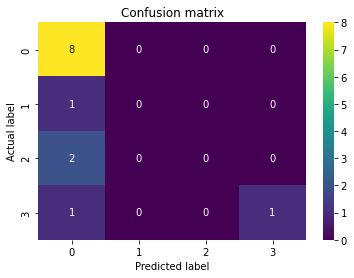

In [237]:
knn = KNeighborsClassifier(n_neighbors = 13)
startTime = time.time()
knn.fit(X_train,y_train)
endTrainTime = time.time()
y_pred = knn.predict(X_test)
endTestTime = time.time()
algorithm = "KNN with k=1"
performance(y_test, y_pred, startTime, endTrainTime, endTestTime, algorithm)

In [238]:
#classification tree
#first do split with gini index which is the default 
#second use entropy option which is information gain 

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = heart_data.iloc[:,0:12] # Features
y =heart_data.iloc[:,-1] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Accuracy:  0.5384615384615384
Precision:  0.5384615384615384
Recall:  0.5384615384615384
F1 Score:  0.5384615384615384
Train Time:  0.003047466278076172
Test Time:  0.0014510154724121094
Confusion matrix



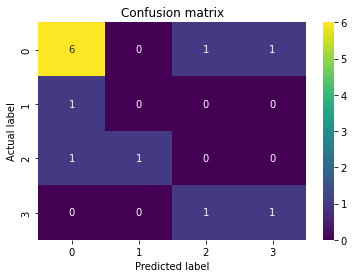

In [239]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
startTime = time.time()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
endTrainTime = time.time()
#Predict the response for test dataset
y_pred = clf.predict(X_test)
endTestTime = time.time()
algorithm = "Desicion Tree with gini index"
performance(y_test, y_pred, startTime, endTrainTime, endTestTime, algorithm)

In [240]:
feature_cols = ['age', 'sex', 'cp', 'trestbps','chol', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

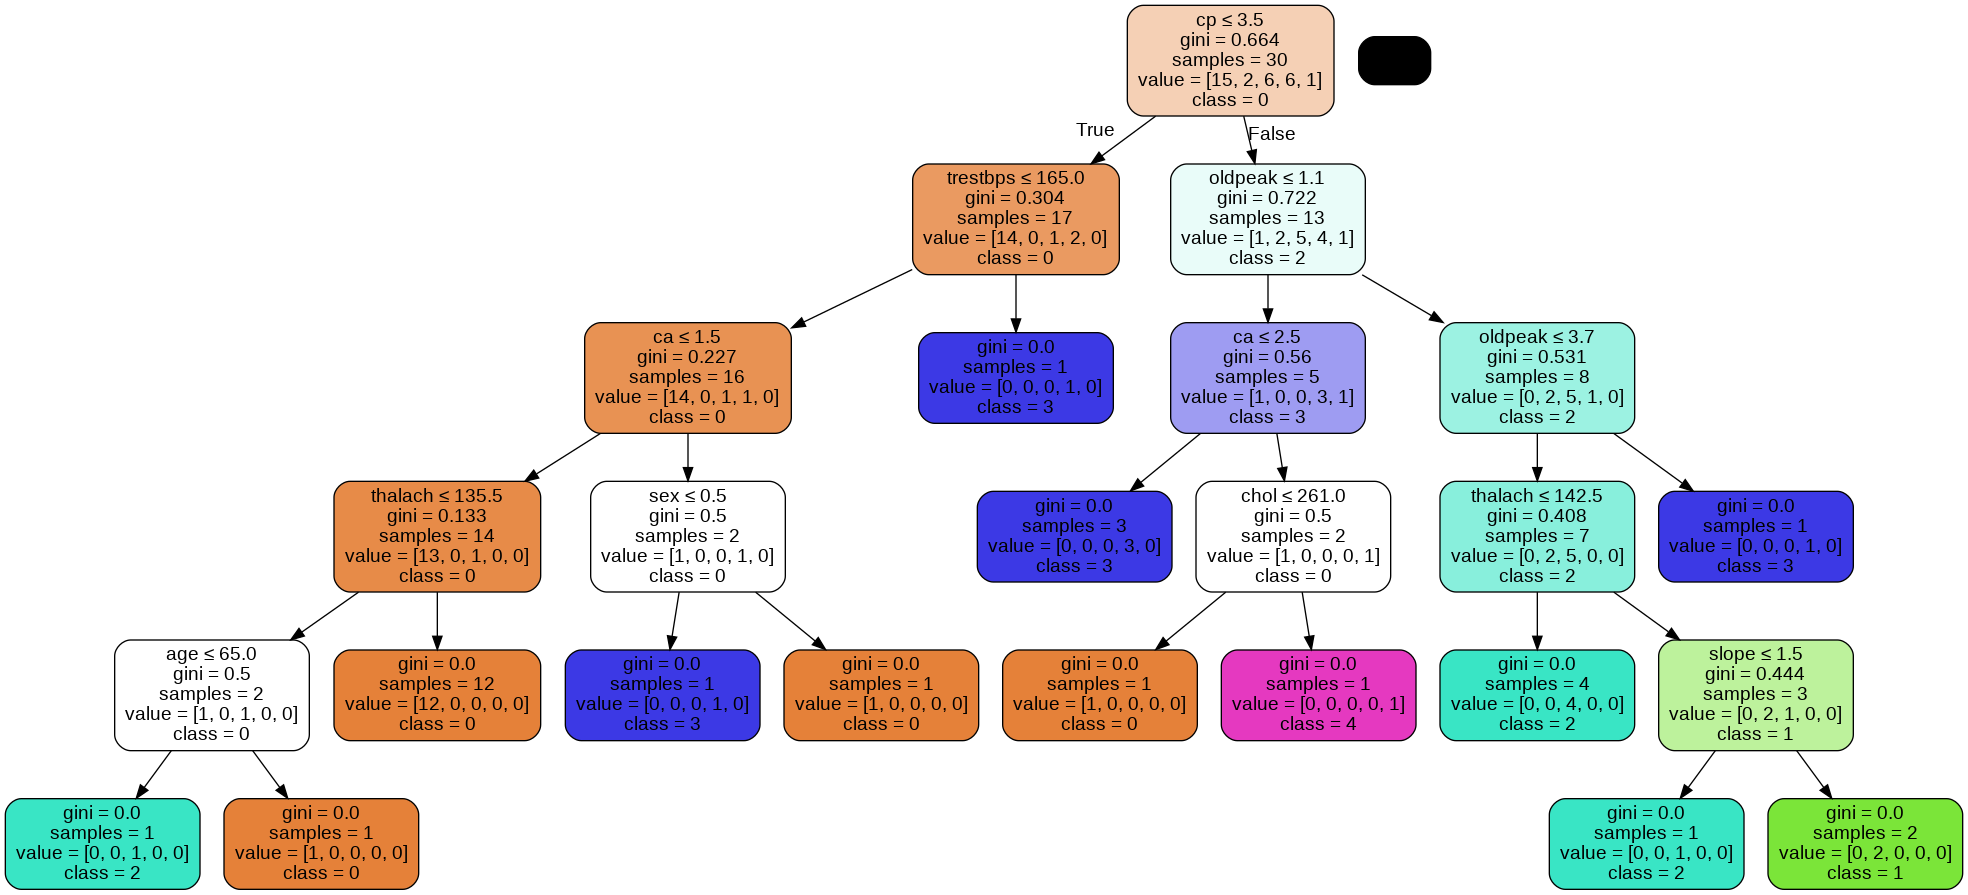

In [241]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols  ,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7692307692307693
Precision:  0.7230769230769231
Recall:  0.7692307692307693
F1 Score:  0.7264957264957265
Train Time:  0.004014015197753906
Test Time:  0.002109527587890625
Confusion matrix



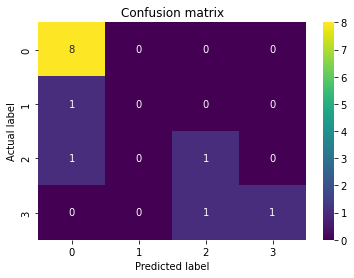

In [242]:
#2)using entropy or information gain for split 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
startTime = time.time()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
endTrainTime = time.time()
#Predict the response for test dataset
y_pred = clf.predict(X_test)
endTestTime = time.time()

algorithm = "Desicion Tree with entropy"
performance(y_test, y_pred, startTime, endTrainTime, endTestTime, algorithm)

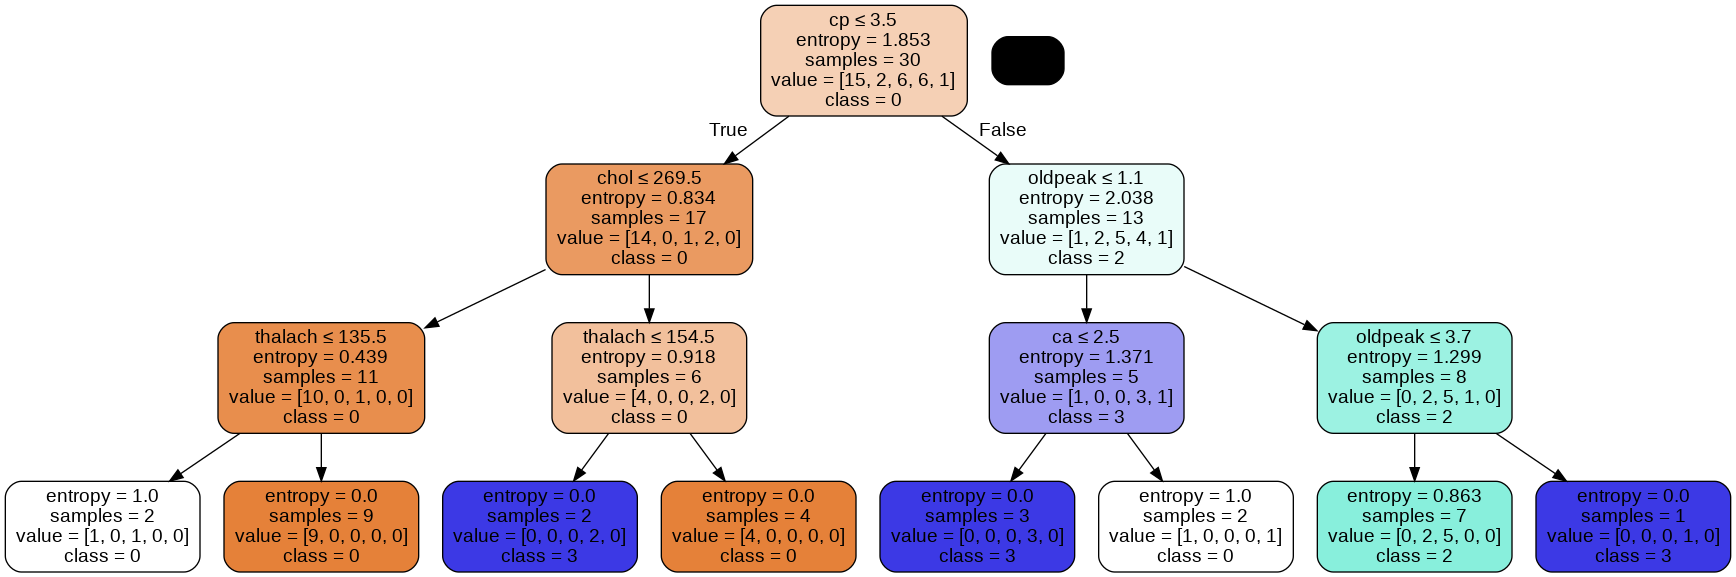

In [243]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6923076923076923
Precision:  0.5692307692307692
Recall:  0.6923076923076923
F1 Score:  0.6239316239316239
Train Time:  0.14886903762817383
Test Time:  0.011850118637084961
Confusion matrix



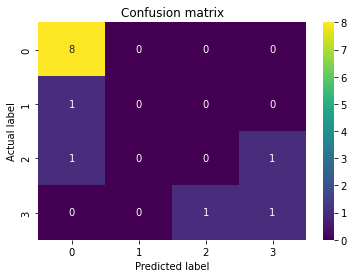

In [244]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=0)
startTime = time.time()
clf.fit(X_train, y_train)
endTrainTime = time.time()
y_pred = clf.predict(X_test)
endTestTime = time.time()

algorithm = "Random Forest Classifier"
performance(y_test, y_pred, startTime, endTrainTime, endTestTime, algorithm)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6923076923076923
Precision:  0.5982905982905983
Recall:  0.6923076923076923
F1 Score:  0.6407239819004525
Train Time:  0.0038115978240966797
Test Time:  0.002565145492553711
Confusion matrix



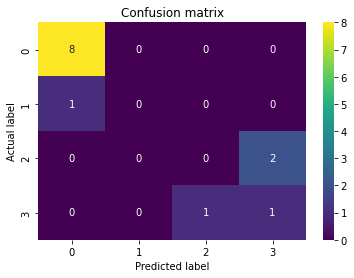

In [245]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


gnb = GaussianNB()
startTime = time.time()
gnb = gnb.fit(X_train,y_train)
endTrainTime = time.time()
y_pred = gnb.predict(X_test)
endTestTime = time.time()

algorithm = "Naive Bayes"
performance(y_test, y_pred, startTime, endTrainTime, endTestTime, algorithm)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.6153846153846154
Precision:  0.5555555555555556
Recall:  0.6153846153846154
F1 Score:  0.583710407239819
Train Time:  0.3293297290802002
Test Time:  0.0027701854705810547
Confusion matrix



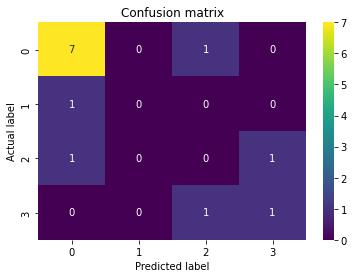

In [246]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
startTime = time.time()
clf.fit(X_train, y_train)
endTrainTime = time.time()
y_pred = clf.predict(X_test)
endTestTime = time.time()


algorithm = "Gradient Boosting"
performance(y_test, y_pred, startTime, endTrainTime, endTestTime, algorithm)

In [247]:
performance_metrics = pd.DataFrame()
performance_metrics['algorithms'] = algorithms
performance_metrics['accuracy'] = accuracy
performance_metrics['precision'] = precision
performance_metrics['recall'] = recall
performance_metrics['F1score'] = F1score
performance_metrics['time_taken_train'] = time_taken_train
performance_metrics['time_taken_test'] = time_taken_test


In [248]:
performance_metrics


,algorithms,accuracy,precision,recall,F1score,time_taken_train,time_taken_test
0,KNN with k=1,0.692308,0.564103,0.692308,0.594872,0.002110,0.003389
1,Desicion Tree with gini index,0.538462,0.538462,0.538462,0.538462,0.003047,0.001451
2,Desicion Tree with entropy,0.769231,0.723077,0.769231,0.726496,0.004014,0.002110
3,Random Forest Classifier,0.692308,0.569231,0.692308,0.623932,0.148869,0.011850
4,Naive Bayes,0.692308,0.598291,0.692308,0.640724,0.003812,0.002565
5,Gradient Boosting,0.615385,0.555556,0.615385,0.583710,0.329330,0.002770


In [249]:
algorithm = ['KNN', 'DTG', 'DTE', 'RFC','NB','GB']

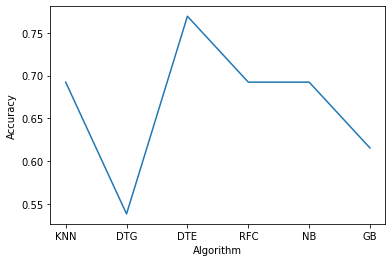

In [250]:

plt.figure()
plt.plot(algorithm, accuracy)

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

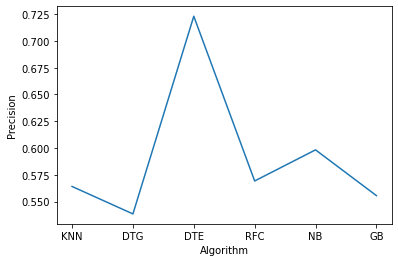

In [251]:

plt.figure()
plt.plot(algorithm, precision)

plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.show()

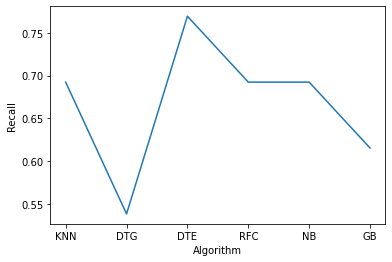

In [252]:

plt.figure()
plt.plot(algorithm, recall)

plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.show()

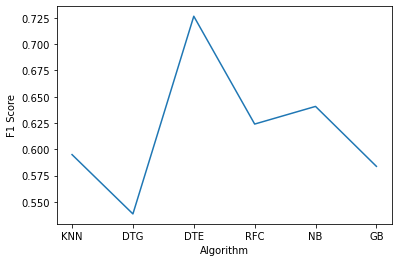

In [253]:

plt.figure()
plt.plot(algorithm, F1score)

plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.show()

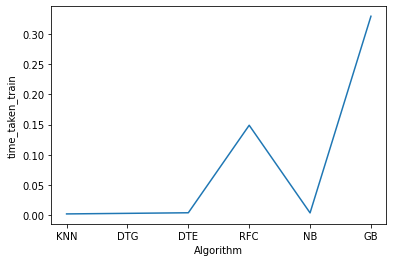

In [254]:

plt.figure()
plt.plot(algorithm, time_taken_train)

plt.xlabel('Algorithm')
plt.ylabel('time_taken_train')
plt.show()

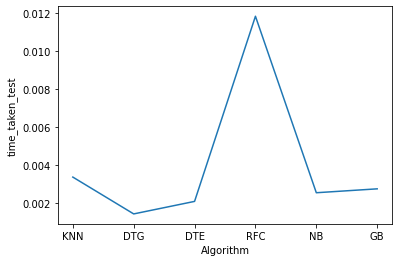

In [255]:
plt.figure()
plt.plot(algorithm, time_taken_test)

plt.xlabel('Algorithm')
plt.ylabel('time_taken_test')
plt.show()